### importing necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 1. Business understanding 
MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments
goal: to perform a quick analysis of an environmental measurement provided by the engineering team and translate your observation as a strategy report for the company

### 2. Data understanding
     - datasets  sources.
        -data source from: https://energydata.info/dataset/?q=Solar+Radiation+Measurement&vocab_regions=AFR

     -data structure and variable descriptions.
        -Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

#### => Describe data structure

In [5]:
#load data 
#data = pd.read_csv("../data/benin_malanville.csv")

data = '../data/benin_malanville.csv'  

try:
    # Load the CSV file
    df = pd.read_csv(data)
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully. Shape: (525600, 19)


In [7]:

print("Data Shape:", df.shape)

Data Shape: (525600, 19)


output: data have 525600 rows and 19 columns

In [8]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4    

In [9]:
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9   

        Comments

In [10]:
#data information
print("\nData Informtion:")
print(df.info())


Data Informtion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB      

#### Specifying numerical and categorical columns

In [11]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [12]:
#for categorical or boolean columns
print(df.describe(include=['object', 'category', 'bool']))

               Timestamp
count             525600
unique            525600
top     2022-08-08 23:44
freq                   1


In [13]:
numerical_columns = []  
categorical_columns = [] 


if not numerical_columns:
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if not categorical_columns:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Categorical columns: ['Timestamp']


#### =>Check for missing values

In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [15]:
# Impute numerical columns using mean
for col in numerical_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

In [17]:
for col in categorical_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [21]:
# Remove or Correct Outliers (for numerical columns)
if numerical_columns:
    # Identify outliers using z-score
    z_scores = np.abs(stats.zscore(df[numerical_columns]))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    print("\nOutlier rows (z-score):\n", df[outliers])



Outlier rows (z-score):
                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
665     2021-08-09 11:09  843.0  304.1  554.9  790.5  796.6  30.2  69.1  2.3   
666     2021-08-09 11:10  776.4  201.1  583.3  740.4  745.0  30.2  69.0  2.8   
704     2021-08-09 11:56  644.6   60.8  577.8  600.1  603.9  30.4  67.9  3.2   
705     2021-08-09 11:57  611.0   17.1  587.4  572.2  575.5  30.3  68.1  3.6   
706     2021-08-09 12:01  617.5   27.1  583.6  579.7  583.8  30.4  68.4  3.2   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
507407  2022-08-08 18:11   16.3   -0.1   16.3   18.4   17.9  22.3  98.8  0.7   
507412  2022-08-08 18:16   15.9   -0.1   15.8   18.4   18.1  22.2  98.8  0.6   
507418  2022-08-08 18:22   15.1   -0.1   15.1   17.8   17.4  22.3  98.8  0.3   
507432  2022-08-08 18:36    8.1   -0.1    7.7   11.7   11.4  22.4  98.5  0.1   
507660  2022-08-08 22:24   -5.6   -0.2   -5.5    0.0    0.0  22.9  98.7  2.2   

        WSgus

In [ ]:
# Remove outliers
df = df[~outliers].reset_index(drop=True)

In [24]:
#Standardize Data
# Convert categorical text to consistent format (lowercase)
for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()


In [25]:
#Normalize numerical columns using StandardScaler
if numerical_columns:
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

g:\Tnxs\kifiya5\week0\tenx-week-0-solar-data-discovery\.venv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
g:\Tnxs\kifiya5\week0\tenx-week-0-solar-data-discovery\.venv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
g:\Tnxs\kifiya5\week0\tenx-week-0-solar-data-discovery\.venv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#### =>Check for Duplicates


In [11]:
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


Number of Duplicate Rows: 0


In [26]:
#Remove Duplicates
print("\nDuplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [29]:
# Encode Categorical Variables
# Since 'Timestamp' is the only categorical column, do not one-hot encode it.
# Instead, extract useful time features.

if 'Timestamp' in df.columns:
    # Convert to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Extract features
    df['year'] = df['Timestamp'].dt.year
    df['month'] = df['Timestamp'].dt.month
    df['day'] = df['Timestamp'].dt.day
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute
    # Optionally drop the original column if not needed
    # df = df.drop('Timestamp', axis=1)


In [30]:
#Display the cleaned dataset
print("\nCleaned Dataset:\n", df.head())


Cleaned Dataset:
             Timestamp       GHI       DNI       DHI      ModA      ModB  \
0 2021-08-09 00:01:00 -0.703196 -0.621179 -0.721519 -0.696656 -0.695861   
1 2021-08-09 00:02:00 -0.702885 -0.621179 -0.721519 -0.696656 -0.695861   
2 2021-08-09 00:03:00 -0.702885 -0.621179 -0.721519 -0.696656 -0.695861   
3 2021-08-09 00:04:00 -0.702885 -0.620793 -0.720846 -0.696656 -0.695861   
4 2021-08-09 00:05:00 -0.702574 -0.620793 -0.720846 -0.696656 -0.695861   

       Tamb        RH        WS    WSgust  ...  Cleaning  Precipitation  \
0 -0.310378  1.383376 -1.366146 -1.223595  ...       0.0            0.0   
1 -0.310378  1.390547 -1.366146 -1.439424  ...       0.0            0.0   
2 -0.310378  1.394132 -1.163341 -0.845895  ...       0.0            0.0   
3 -0.310378  1.379791 -1.230943 -1.061724  ...       0.0            0.0   
4 -0.310378  1.379791 -1.298545 -1.061724  ...       0.0            0.0   

      TModA     TModB  Comments  year  month  day  hour  minute  
0 -0.573707 -

In [31]:

print("\nCleaned Dataset:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499709 entries, 0 to 499708
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      499709 non-null  datetime64[ns]
 1   GHI            499709 non-null  float64       
 2   DNI            499709 non-null  float64       
 3   DHI            499709 non-null  float64       
 4   ModA           499709 non-null  float64       
 5   ModB           499709 non-null  float64       
 6   Tamb           499709 non-null  float64       
 7   RH             499709 non-null  float64       
 8   WS             499709 non-null  float64       
 9   WSgust         499709 non-null  float64       
 10  WSstdev        499709 non-null  float64       
 11  WD             499709 non-null  float64       
 12  WDstdev        499709 non-null  float64       
 13  BP             499709 non-null  float64       
 14  Cleaning       499709 non-null  float64       
 15  

In [32]:
#Save cleaned dataset to a new CSV file
output_file = '../data/benin_clean.csv'
df.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved to {output_file}")


Cleaned dataset saved to ../data/benin_clean.csv


### 3. Perform exploratory data analysis (EDA)

In [33]:
data = '../data/benin_clean.csv'  

try:
    # Load the CSV file
    df = pd.read_csv(data)
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully. Shape: (499709, 24)


#### I. Univariate Analysis

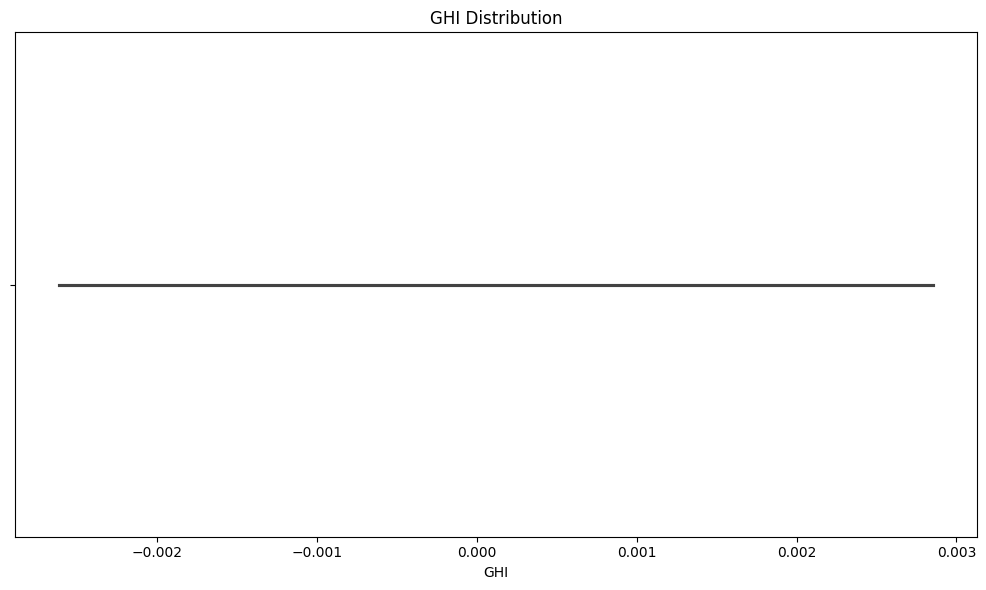

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="GHI", data=df)
# Customize the plot
plt.title("GHI Distribution")
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

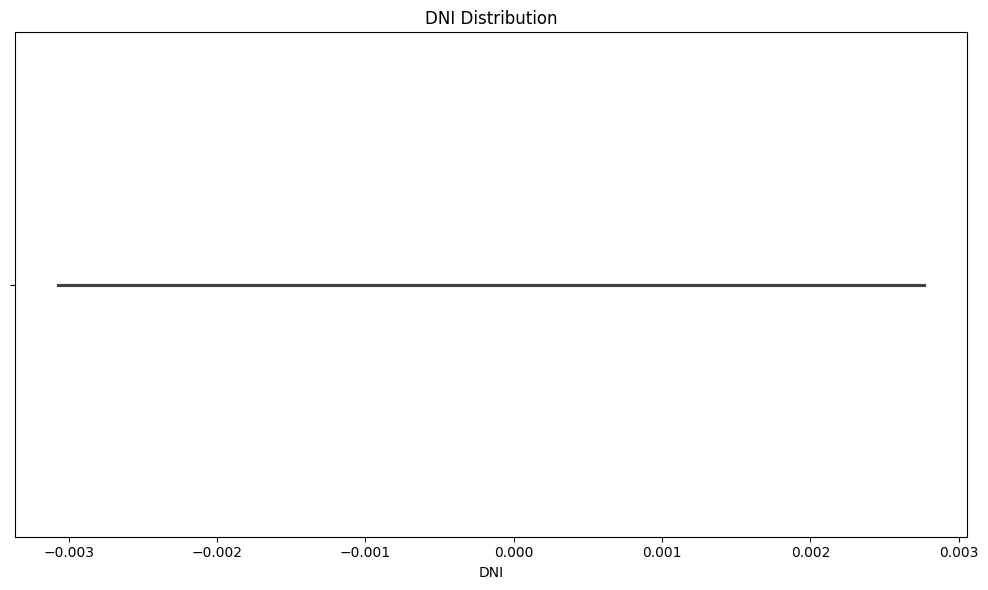

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x="DNI", data=df)
# Customize the plot
plt.title("DNI Distribution")
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

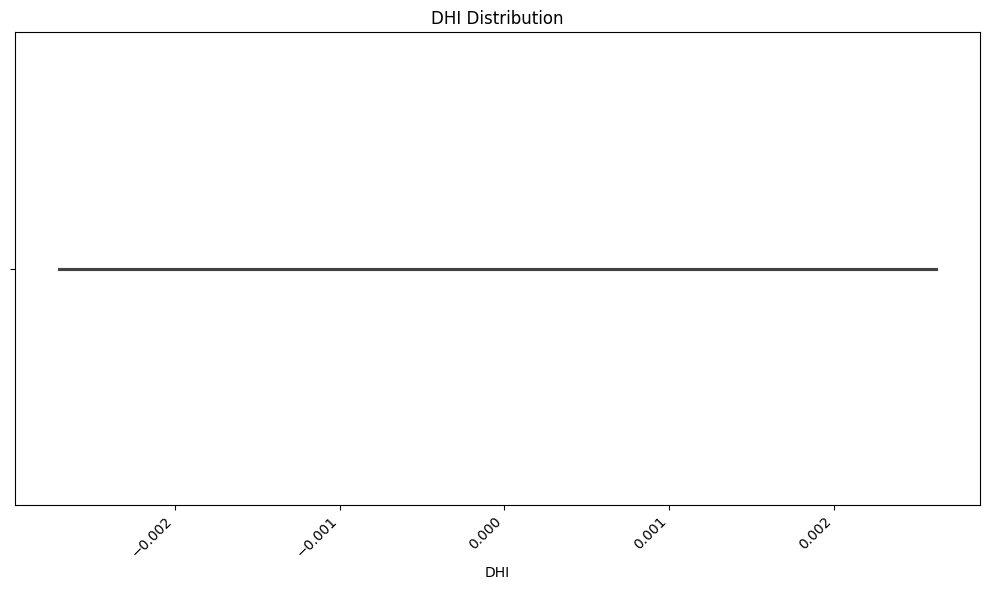

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x="DHI", data=df)
# Customize the plot
plt.title("DHI Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

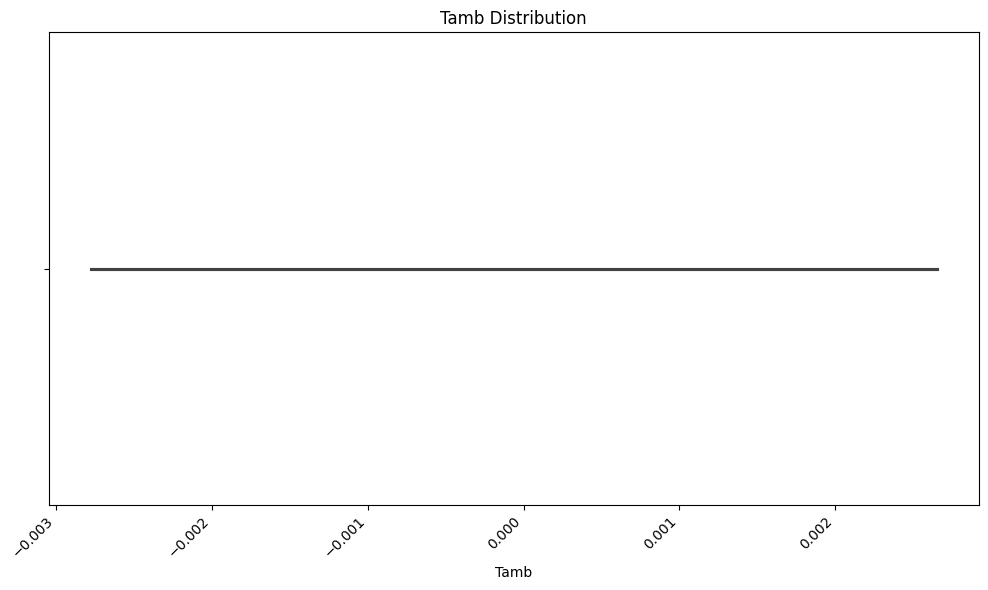

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Tamb", data=df)
# Customize the plot
plt.title("Tamb Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()